## Generating data for Number of sessions per User

In [0]:
import scipy
from  scipy   import   stats
import random

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:


def generate():
  


  user_session = stats.geom.rvs(size=4000,p=0.3,random_state=42)
  return user_session
          # Generate geometric data
         # With success prob 0.3
        
                                
user_session=generate()


In [0]:
user_session.size,user_session.max(),user_session.min()

(4000, 23, 1)

In [0]:
user_session[:10],sum(user_session)

(array([2, 9, 4, 3, 1, 1, 1, 6, 3, 4]), 13258)

In [0]:
count_dict = {x : list(user_session).count(x) for x in user_session}
count_dict

{1: 1228,
 2: 811,
 3: 590,
 4: 411,
 5: 302,
 6: 199,
 7: 134,
 8: 89,
 9: 68,
 10: 63,
 11: 28,
 12: 25,
 13: 16,
 14: 11,
 15: 6,
 16: 6,
 17: 6,
 18: 3,
 20: 1,
 21: 1,
 22: 1,
 23: 1}

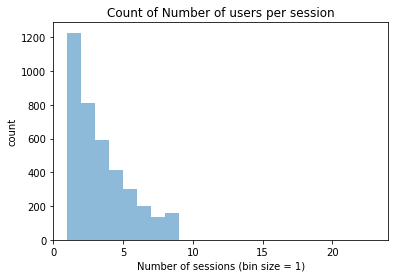

In [0]:
   #depicts number of users per number of sessions
    
bins = np.arange(0, 10, 1) # fixed bin size

plt.xlim([min(user_session)-1, max(user_session) +1])

plt.hist(user_session, bins=bins, alpha=0.5)
plt.title("Count of Number of users per session")
plt.xlabel('Number of sessions (bin size = 1)')
plt.ylabel('count')

plt.show()

In [0]:
import numpy as np
user_Id = range(1,4000)

In [0]:
userId_session = zip(user_Id,[10*i for i in user_session])

In [0]:
type(userId_session), userId_session[:5]

(list, [(1, 20), (2, 90), (3, 40), (4, 30), (5, 10)])

In [0]:
#Calculating total number of articles served in a day in all sessions (may be clicked or not)

sum1 = 0
for i in range(len(userId_session)):
    
    sum1 += userId_session[i][1]
    
sum1    

132570

In [0]:
UserIDs = []

for i in range(len(userId_session)):
    
    for j in range(userId_session[i][1]):
        UserIDs.append(userId_session[i][0])
            

In [0]:
len(UserIDs)   #matches with sum1 above

132570

In [0]:
UserIDs[:20]   # UserIds generated for all sessions the user opens

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [0]:
session_list = list(user_session)
session_list[:10]

[2, 9, 4, 3, 1, 1, 1, 6, 3, 4]

In [0]:
session_Id =[]

for i in session_list:
    
    for j in range(1,i+1):
#         print j
        session_Id.append([j for i in range(10)])
        
  

In [0]:
session_Id[:5]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]

In [0]:
session_Id = np.array(session_Id).flatten()

In [0]:
session_Id.shape

(134600,)

In [0]:
User_session = zip(UserIDs,session_Id )

In [0]:
len(User_session),type(User_session)

(132570, list)

In [0]:
User_session[:24]

[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (1, 2),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1)]

In [0]:
import pandas as pd

df = pd.DataFrame(User_session, columns=['UserId', 'SessionId'])

In [0]:
df.head()

,UserId,SessionId
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [0]:
Article_Id = range(4829)

In [0]:
Article_Id = Article_Id*(len(UserIDs)/4829)  

len(Article_Id)

130383

In [0]:
len(User_session)-len(Article_Id)

2187

In [0]:
import random
for x in range(len(User_session)-len(Article_Id)):# to   make square   matrix
    Article_Id.append(random.randint(1,4829))

In [0]:
len(Article_Id)

132570

In [0]:
from random import shuffle
shuffle(Article_Id)

In [0]:
df['ArticleId_served'] = Article_Id

In [0]:
df.head(10)

,UserId,SessionId,ArticleId_served
0,1,1,4734
1,1,1,2416
2,1,1,3796
3,1,1,1579
4,1,1,3517
5,1,1,443
6,1,1,2722
7,1,1,1574
8,1,1,1664
9,1,1,3529


In [0]:
len(df)

134590

In [0]:
df1=df.copy()
groups1=df1.groupby(['UserId'])
groups1.get_group(1).ArticleId_served.to_list()

[1174,
 3421,
 3696,
 1124,
 3364,
 3438,
 2161,
 4465,
 1077,
 3704,
 2531,
 2175,
 4469,
 3721,
 2897,
 3400,
 1511,
 4311,
 2221,
 4759]

In [0]:
df1.UserId.unique()
user_table={}
for  i  in range(1,len(df1.UserId.unique())+1):
  user_table[i]=groups1.get_group(i).ArticleId_served.to_list()

In [0]:
s = (3999,4830)

zero_user_table=np.zeros(s)
zero_user_table.shape

(3999, 4830)

In [0]:
for i in  range(1,3999):
  ls=user_table[i]
  for j  in  ls:
    zero_user_table[i][j]=1

In [0]:
zero_user_table[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
np.save('user-item-table',zero_user_table)

## Now, lets model number of clicks per session

We  are  assuming no session is diffrent from other seesion
May be in a peak session or at some time of breaking news more people come to website.
But due to assumption of poisson distribution we did that



In [0]:
from scipy import stats


#https://stackoverflow.com/questions/48409212/what-is-the-meaning-of-mu-loc-and-size-in-the-scipy-stats-poisson

# mu stands for mean

# size  stands for number of random variables we want to generate
clicks_per_session = stats.poisson.rvs(size=len(df)/10,  # Generate Poisson data
                                   mu=1 , loc = 1,random_state=42 )       # Average clicks per session = 1

# divided by  10 

# Print table of counts
print( pd.crosstab(index="counts", columns= clicks_per_session)) # to see  the frequency  of clicks in a session


col_0      1     2     3    4    5   6  7  8
row_0                                       
counts  4877  4885  2413  837  199  39  6  1


In [0]:
len(clicks_per_session)

13257

In [0]:
clicks_per_session,len(clicks_per_session)

(array([2, 3, 1, ..., 1, 2, 2]), 13257)

In [0]:

def click_checker():
  clicked_or_not = []
  random.seed(12)
  for clicks in clicks_per_session:
      
      session_list = [0 for i in range(10-clicks)] 
      #for ex if there are 3 clicks in a session we will insert 10-3=7. Seven zeros that means
      # any 7 items were not clicked
      
      for i in range(clicks):
          
          session_list.append(1) # append ones for no of clicks per session
          
      random.shuffle(session_list) #user can click any item from 10 articles shown to it
      clicked_or_not.append(session_list)
  return clicked_or_not
clicked_or_not=click_checker()
  

In [0]:
clicked_or_not[0]

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

In [0]:
len(clicked_or_not)  

13257

In [0]:
click = np.array(clicked_or_not).flatten()
click.shape,click.sum()                  #Converted into a binary array depicting clicks and No-click

click_sum=click.sum()
print(click_sum)

26513


In [0]:
df['Click'] = click

In [0]:
df.head(1)

,UserId,SessionId,ArticleId_served,Click
0,1,1,1174,0


In [0]:
len(list(df['ArticleId_served'].unique()))

4830

In [0]:

clicks=pd.DataFrame(columns=['Article','Total_clicks'])
for i in range(len(list(df['ArticleId_served'].unique()))):
  _temp=df.groupby('ArticleId_served')
  _1=_temp.get_group(i)['Click'].sum()
  clicks=clicks.append({'Article':i,'Total_clicks':_1},ignore_index=True)

8


,Article,Total_clicks
0,0,8
1,1,4
2,2,2
3,3,5
4,4,5
5,5,6
6,6,11
7,7,6
8,8,4
9,9,6


In [0]:
clicks.to_csv('clicks.csv')

1. What is Chi squared test: https://www.youtube.com/watch?v=dXB3cUGnaxQ

In Chi squared distribution mean = no of degree of freedoms(k)

and variance = 2k


In [0]:
from scipy.stats import chi
from scipy.stats import norm
import scipy
# first argument in norm is loc a.k.a mean and second argument is standard devaition a.k.a standard deviation
# mycomps = (chi(2,3,8),norm(30, 9),norm(60,9),norm(90,8))
mycomps=(norm(30,9),norm(60,9),norm(90,9))
priors = [0.45,0.25,0.15]

In [0]:
print(mycomps[0].pdf(39))

0.026885636057682596


In [0]:
def myMixture(x,priors,myComponents):
    s = 0
    for comp,prior in zip(myComponents,priors):
        s += comp.pdf(x)*prior
    return s

In [0]:
import numpy as np
x_data = np.linspace(0.0,100,1000)   #Generates 1000 numbers between 0 and 100
#using uniform distribution


In [0]:
y_data = myMixture(x_data,priors,mycomps)
y_data[:5]

array([7.71139523e-05, 8.00215912e-05, 8.30285932e-05, 8.61379341e-05,
       8.93526630e-05])

In [0]:
len(y_data)

1000

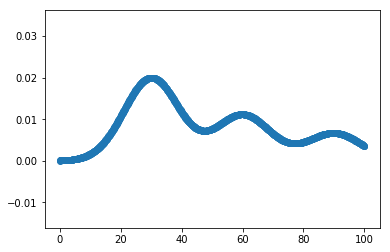

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_data,y_data)

In [0]:
def genSample(sample_size,priors,myComponents):
    myData = np.empty( shape=(0) )
    for prior,comp in zip(priors,myComponents):
        new_data = comp.rvs(int(sample_size*prior))
        myData = np.append(myData,new_data)
    return myData
  # this function actually menas the priority we want to give to each one of 3 distributions
  # by deciding the number of data points they contribute to total no of clicks for their corresponding percentage time
  # means if distribution norm(20,9) has prior of 0.35 it means 35 percent of varibale will belong to this distribution


In [0]:
data = genSample(click_sum,priors,mycomps)

len(data)

22534

In [0]:
print(data[:1],data.min(),data.max())

for i in range(len(data)):
    if data[i]<0:
        data[i] *= -1 # multiplying by -1 to make the corresponding time positve it's kind of taking absolute  of number
        # because time cannot be negative



(array([38.58390814]), -8.044411565696613, 125.67386840794165)


In [0]:
print(min(data),max(data),len(data))
data = np.append(data,[10])
len(data)

(0.036098579892996696, 125.67386840794165, 22534)


22535

In [0]:
data[0]

38.583908140517266

In [0]:
click[:20]

array([ 0,  0,  0, 38,  0,  0,  0, 25,  0,  0, 33,  8,  0,  0,  0,  0,  0,
       36,  0,  0])

In [0]:
final_time = click

j=0
for i in range(len(click)):
    
    if click[i] == 1:#where  there is a click assign that point a  time thatwe created by gaussian mixture model
        final_time[i] = data[j]
        j +=1
        

In [0]:
len(final_time),final_time[:100]

(132570,
 array([ 0,  0,  0, 38,  0,  0,  0, 25,  0,  0, 33,  8,  0,  0,  0,  0,  0,
        36,  0,  0,  0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 21,  0,  0,  0,  0, 22, 30,  0, 24,  0,  0,  0,  0, 25, 30,
         0,  0,  0,  0,  0, 29, 23,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        41,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,  0,  0,  0, 47]))

In [0]:
df['Percentage Time Spent'] = final_time

df.head(21)

,UserId,SessionId,ArticleId_served,Click,Percentage Time Spent
0,1,1,4734,0,0
1,1,1,2416,0,0
2,1,1,3796,0,0
3,1,1,1579,1,38
4,1,1,3517,0,0
5,1,1,443,0,0
6,1,1,2722,0,0
7,1,1,1574,1,25
8,1,1,1664,0,0
9,1,1,3529,0,0


In [0]:
df['Percentage Time Spent'].min()


0

In [0]:
df.to_csv("Generated_Click_Stream_Data.csv")